0513 금요일 과제 [필사]

### **07 문서 군집화 실습(Opinion Review 데이터 세트)**

#### **문서 군집화 개념**

* 비슷한 텍스트 구성의 문서를 군집화(Clustering)
* 학습 데이터 세트가 필요 없는 비지도학습 기반으로 동작한다는 점이 텍스트 분류 기반의 문서 분류와의 차이점.

#### **Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기**

In [3]:
import pandas as pd
import glob, os

# 디렉터리 설정
path = 'topics'
# path로 지정한 디렉터리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합.
all_files = glob.glob(os.path.join(path,'*.data'))
filename_list = []
opinion_text = []

# 개별 파일의 파일명은 filename_list로 취합,
# 개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')

    # 절대 경로로 주어진 파일명을 가공. 리눅스에서 수행할 때는 다음 \\를 /로 변경.
    # 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]

    # 파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가.
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 list와 파일 내용 list 객체를 DataFrame으로 생성
document_df= pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,battery-life_amazon_kindle,...
1,gas_mileage_toyota_camry_2007,...
2,food_holiday_inn_london,...
3,directions_garmin_nuvi_255W_gps,...
4,location_holiday_inn_london,...


In [6]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

nltk.download('punkt')
nltk.download('wordnet')
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
# opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [8]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행.
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [9]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,battery-life_amazon_kindle,...,2
1,gas_mileage_toyota_camry_2007,...,1
2,food_holiday_inn_london,...,0
3,directions_garmin_nuvi_255W_gps,...,4
4,location_holiday_inn_london,...,0


In [10]:
# 정렬칼럼명으로 데이터 정렬
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
27,bathroom_bestwestern_hotel_sfo,...,0
2,food_holiday_inn_london,...,0
9,food_swissotel_chicago,...,0
29,free_bestwestern_hotel_sfo,...,0
31,location_bestwestern_hotel_sfo,...,0
4,location_holiday_inn_london,...,0
18,parking_bestwestern_hotel_sfo,...,0
46,price_holiday_inn_london,...,0
20,room_holiday_inn_london,...,0
42,rooms_bestwestern_hotel_sfo,...,0


호텔에 대한 리뷰로 군집화 됨.

In [11]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
26,comfort_honda_accord_2008,...,1
37,comfort_toyota_camry_2007,...,1
1,gas_mileage_toyota_camry_2007,...,1
6,interior_honda_accord_2008,...,1
19,interior_toyota_camry_2007,...,1
33,mileage_honda_accord_2008,...,1
44,performance_honda_accord_2008,...,1
8,quality_toyota_camry_2007,...,1
5,seats_honda_accord_2008,...,1
41,transmission_toyota_camry_2007,...,1


자동차에 대한 리뷰로 군집화 됨.

In [12]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,battery-life_amazon_kindle,...,2
36,battery-life_ipod_nano_8gb,...,2
12,battery-life_netbook_1005ha,...,2
21,keyboard_netbook_1005ha,...,2
38,performance_netbook_1005ha,...,2
15,screen_ipod_nano_8gb,...,2
50,screen_netbook_1005ha,...,2
28,size_asus_netbook_1005ha,...,2
35,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,2
25,video_ipod_nano_8gb,...,2


포터블 전자기기에 대한 리뷰로 군집이 구성됨.

In [13]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
11,buttons_amazon_kindle,...,3
48,eyesight-issues_amazon_kindle,...,3
49,fonts_amazon_kindle,...,3
14,navigation_amazon_kindle,...,3
24,price_amazon_kindle,...,3
22,speed_windows7,...,3


포터블 전자기기에 대한 리뷰로 군집화 됨.

In [14]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
45,accuracy_garmin_nuvi_255W_gps,...,4
3,directions_garmin_nuvi_255W_gps,...,4
7,display_garmin_nuvi_255W_gps,...,4
13,features_windows7,...,4
32,satellite_garmin_nuvi_255W_gps,...,4
23,screen_garmin_nuvi_255W_gps,...,4
47,speed_garmin_nuvi_255W_gps,...,4
34,updates_garmin_nuvi_255W_gps,...,4
43,voice_garmin_nuvi_255W_gps,...,4


차량용 네비게이션으로 군집이 구성됨.

In [15]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# 소속 군집을 cluster_label 칼럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
16,service_swissotel_hotel_chicago,...,0
20,room_holiday_inn_london,...,0
42,rooms_bestwestern_hotel_sfo,...,0
40,staff_swissotel_chicago,...,0
39,service_bestwestern_hotel_sfo,...,0
46,price_holiday_inn_london,...,0
10,staff_bestwestern_hotel_sfo,...,0
17,service_holiday_inn_london,...,0
9,food_swissotel_chicago,...,0
27,bathroom_bestwestern_hotel_sfo,...,0


* cluster 0: 호텔에 대한 리뷰
* cluster 1: 자동차 리뷰
* cluster 2: 포터블 전자기기 리뷰

#### **군집별 핵심 단어 추출하기**

clusters_centers_ : 각 군집을 구성하는 단어 피처가 군집의 중심을 기준으로 얼마나 가까운지
* 구성
    * 행: 개별 군집
    * 열: 개별 피처
* 각 배열 내의 값은 개별 군집 내의 상대 위치를 숫자 값으로 표현한 좌표 값.

In [17]:
clsuter_centers = km_cluster.cluster_centers_
print('cluster_centers shape:', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape: (3, 4611)
[[0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.01005322 0.         0.         ... 0.00706287 0.         0.        ]]


* 군집이 3개, word 피처는 4611개로 구성됨.
* 배열 값: 피처의 위치와 개별 중심이 얼마나 가까운지 상대값으로 표현한 것. 0에서 1까지의 수 (1에 가까울수록 중심과 가깝다)

In [24]:
# 군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환함.
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num,
                        top_n_features=10):
    cluster_details = {}

    # cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]

    # 개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화.
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num

        # cluster_centers_.argsort()[:,::-1]로 구한 인덱스를 이용해 top n 피처 단어를 구함.
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]

        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함.
        top_feature_values = cluster_model.cluster_centers_[cluster_num,
                                                            top_feature_indexes].tolist()

        # cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_values'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()

        cluster_details[cluster_num]['filenames'] = filenames

    return cluster_details


In [25]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('###### cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명:', cluster_detail['filenames'][:7])
        print('==============================================')

In [26]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                      feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

###### cluster 0
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명: ['food_holiday_inn_london', 'location_holiday_inn_london', 'food_swissotel_chicago', 'staff_bestwestern_hotel_sfo', 'service_swissotel_hotel_chicago', 'service_holiday_inn_london', 'parking_bestwestern_hotel_sfo']
###### cluster 1
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명: ['gas_mileage_toyota_camry_2007', 'seats_honda_accord_2008', 'interior_honda_accord_2008', 'quality_toyota_camry_2007', 'interior_toyota_camry_2007', 'comfort_honda_accord_2008', 'mileage_honda_accord_2008']
###### cluster 2
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명: ['battery-life_amazon_kindle', 'directions_garmin_nuvi_255W_gps', 'display_garmin_nuvi_255W_gps', 'buttons_amazon_kindle',

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


* 호텔 리뷰 군집인 cluster 0에서는 'room', 'hotel', 'service' 등 같은 방과 서비스 등이 핵심 단어로 군집화
* 자동차 리뷰 군집인 cluster 1에서는 'interior', 'seat', 'mileage'. 'comfortable' 등 실내 인테리어, 좌석, 연료 효율 등이 핵심 단어로 군집화
* 포터블 전자제품 리뷰 군집인 cluster 2에서는 'screen', 'battery', 'keyboard', 'battery' 등과 같은 화면과 배터리 수명 등이 핵심 단어로 군집화

### **10 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge**

* train_id : 데이터 id
* name : 제품명
* item_condition_id : 판매자가 제공하는 제품 상태
* category_name : 카테고리 명
* brand_name : 브랜드 이름
* price : 제품 가격. 예측을 위한 타깃 속성
* shipping : 배송비 무료 여부. 1이면 무료(판매자가 지불), 0이면 유료(구매자 지불)
* item_description: 제품에 대한 설명

**데이터 전처리**

In [28]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df = pd.read_csv('mercari_train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1449575, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [29]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449575 entries, 0 to 1449574
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1449575 non-null  int64  
 1   name               1449575 non-null  object 
 2   item_condition_id  1449575 non-null  int64  
 3   category_name      1443387 non-null  object 
 4   brand_name         831047 non-null   object 
 5   price              1449575 non-null  float64
 6   shipping           1449575 non-null  int64  
 7   item_description   1449571 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 88.5+ MB
None


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


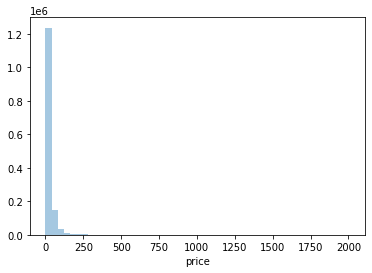

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


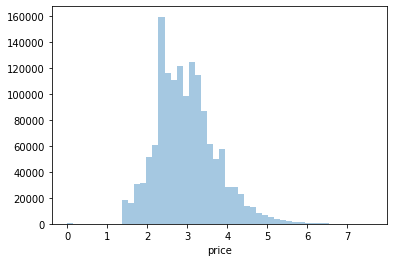

In [31]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df, kde=False)

In [32]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [33]:
print('Shipping 값 유형:\n', mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    801092
1    648483
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    626303
3    422475
2    367161
4     31303
5      2333
Name: item_condition_id, dtype: int64


In [34]:
boolean_cond = mercari_df['item_description'] == 'No description yet'
mercari_df[boolean_cond]['item_description'].count()

80592

In [36]:
# apply lambda에서 호출되는 대, 중, 소 분할 함수 생성, 대, 중, 소 값을 리스트로 반환
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null', 'Other_Null', 'Other_Null']

# 위의 split_cat()을 apply lambda에서 호출해 대, 중, 소 칼럼을 mercari_df에 생성.
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] =  zip(*mercari_df['category_name'].apply(lambda x:split_cat(x)))

# 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 개수만 추출
print('대분류 유형:\n', mercari_df['cat_dae'].value_counts())
print('중분류 개수:', mercari_df['cat_jung'].nunique())
print('소분류 개수:', mercari_df['cat_so'].nunique())

대분류 유형:
 Women                     649490
Beauty                    203175
Kids                      167865
Electronics               119989
Men                        91683
Home                       66374
Vintage & Collectibles     45500
Other                      44345
Handmade                   30182
Sports & Outdoors          24784
Other_Null                  6188
Name: cat_dae, dtype: int64
중분류 개수: 114
소분류 개수: 870


In [37]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')

# 각 칼럼별로 Null 값 건수 확인. 모두 0이 나와야 합니다.
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

**피처 인코딩과 피처 벡터화**

In [38]:
print('brand name 의 유형 건수:', mercari_df['brand_name'].nunique())
print('brand name sample 5건:\n', mercari_df['brand_name'].value_counts()[:5])

brand name 의 유형 건수: 4790
brand name sample 5건:
 Other_Null           618528
Nike                  52874
PINK                  52867
Victoria's Secret     46994
LuLaRoe               30310
Name: brand_name, dtype: int64


In [42]:
print('name 의 종류 개수:', mercari_df['name'].nunique())
print('name sample 10건: \n', mercari_df['name'][:10])

name 의 종류 개수: 1199856
name sample 10건: 
 0       MLB Cincinnati Reds T Shirt Size XL
1          Razer BlackWidow Chroma Keyboard
2                            AVA-VIV Blouse
3                     Leather Horse Statues
4                      24K GOLD plated rose
5          Bundled items requested for Ruie
6        Acacia pacific tides santorini top
7      Girls cheer and tumbling bundle of 7
8                     Girls Nike Pro shorts
9    Porcelain clown doll checker pants VTG
Name: name, dtype: object


In [43]:
pd.set_option('max_colwidth', 200)

# item_description의 평균 문자열 크기
print('item_description 평균 문자열 크기:', mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description 평균 문자열 크기: 145.73154200369075


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [45]:
# name 속성에 대한 피처 벡터화 변환
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

# item_description에 대한 피처 벡터화 변환
tfidf_descp = TfidfVectorizer(max_features=50000, ngram_range=(1,3), stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:', X_name.shape)
print('item_description vectorization shape:', X_descp.shape)

name vectorization shape: (1449575, 104429)
item_description vectorization shape: (1449575, 50000)


In [47]:
from sklearn.preprocessing import LabelBinarizer

# brand_name, item_condition_id, shipping 각  피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name = LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat_dae, cat_jung, cat_so 각  피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae = lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [48]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand shape:(1449575, 4790), X_item_cond_id shape:(1449575, 5)
X_shipping shape:(1449575, 1), X_cat_dae shape:(1449575, 11)
X_cat_jung shape:(1449575, 114), X_cat_so shape:(1449575, 870)


In [49]:
from scipy.sparse import hstack
import gc
sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

# hstack 함수를 이용해 인코딩과 벡터화를 수행한 데이터 세트를 모두 결합.
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

# 데이터 세트가 메모리를 많이 차지하므로 사용 목적이 끝났으면 바로 메모리에서 삭제.
del X_features_sparse
gc.collect()

<class 'scipy.sparse.csr.csr_matrix'> (1449575, 160220)


1059

**릿지 회귀 모델 구축 및 평가**

* 적용할 평가 지표: RMSLE
    * RMSE와 유사하지만 오류 값에 로그를 취하는 방식. 
    * 낮은 가격보다 높은 가격에서 오류가 발생할 경우 오류 값이 더 커지는 것을 방지하기 위해 도입.

In [57]:
def rmsle(y, y_pred):
    # underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred),2)))

def evaluate_org_price(y_test, preds):

    # 원본 데이터는 log1p로 변환되었으므로 exmpm1로 원복 필요.
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)

    # rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

In [55]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
    # scipy.sparse 모듈의 hstack을 이용해 희소 행렬 결합
    X = hstack(matrix_list).tocsr()

    X_train, X_test, y_train, y_test = train_test_split(X, mercari_df['price'],
                                                        test_size=0.2, random_state=156)
    
    # 모델 학습 및 예측
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    del X, X_train, X_test, y_train
    gc.collect()

    return preds, y_test

In [58]:
linear_model = Ridge(solver='lsqr', fit_intercept=False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값:', evaluate_org_price(y_test, linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 포함한 때 rmsle 값:', evaluate_org_price(y_test, linear_preds))


Item Description을 제외했을 때 rmsle 값: 0.5036423711776226
Item Description을 포함한 때 rmsle 값: 0.4720876403287019


**LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가**

In [59]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test = model_train_predict(model = lgbm_model, matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:', evaluate_org_price(y_test, lgbm_preds))

LightGBM rmsle 값: 0.45818002232928645


In [60]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:', evaluate_org_price(y_test, preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.45147048232533
